# Importing libaries used

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')
from scipy.stats import skew
from sklearn.feature_selection import SelectKBest, chi2

# Loading Dataset

In [2]:
# Load data
data = pd.read_csv('PEP1.csv')


# Viewing Dataset


In [3]:
# Displaying first 6 rows 
data.head(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


# Finding shape of Dataset 

In [4]:
data.shape

(1460, 81)

# Separating dependent and independent features

In [5]:
X = data.drop(['Id','SalePrice'], axis=1)
Y = data.SalePrice

# Viewing Top 10 missing value features

In [6]:
missing_data_count = X.isna().sum()
missing_data_percent = X.isna().sum() / len(X) * 100

missing_data = pd.DataFrame({
    'Count': missing_data_count,
    'Percent': missing_data_percent
})
missing_data = missing_data[missing_data.Count > 0]
missing_data.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data.head(10)

There are 19 features having missing data.

Top 10 missing value features:


,Count,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


# Viewing Top 10 variables having null values

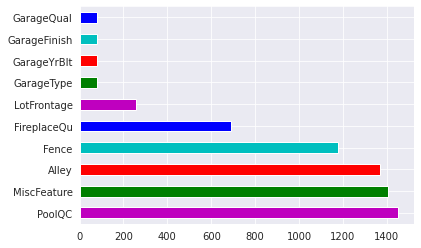

In [7]:
nullval=pd.isnull(data).sum()[pd.isnull(data).sum()>0]
feature_null=pd.Series(nullval)
feature_null.nlargest(10).plot(kind='barh',color=['m','g','r','c','b'])
plt.show()

In [8]:
# gra=[]
# for col in data:
#    gra.append((col,data[col].nunique()))
    
# bb=pd.DataFrame(gra)
# bb

# Printing Variables with Unique values 

In [9]:
x={}
for col in data:
    print(col, data[col].nunique())

Id 1460
MSSubClass 15
MSZoning 5
LotFrontage 110
LotArea 1073
Street 2
Alley 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
MasVnrArea 327
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinSF1 637
BsmtFinType2 6
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchebvGr 4
KitchenQual 4
TotRmsAbvGrd 12
Functiol 7
Fireplaces 4
FireplaceQu 5
GarageType 6
GarageYrBlt 97
GarageFinish 3
GarageCars 5
GarageArea 441
GarageQual 5
GarageCond 5
PavedDrive 3
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
PoolQC 3
Fence 4
MiscFeature 4
MiscVal 2

# Diplaying Variables with numerical data

In [10]:
numCols = list(X.select_dtypes(exclude='object').columns)
print(f"There are {len(numCols)} numerical features:\n", numCols)

There are 36 numerical features:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


# Diplaying Variables with categorical data

In [11]:
catCols = list(X.select_dtypes(include='object').columns)
print(f"There are {len(catCols)} catagorical features:\n", catCols)

There are 43 catagorical features:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functiol', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


# Seprating Numerical and Categorical Data

In [12]:
num_data = X.select_dtypes(include=np.number)
cat_data= X.select_dtypes(exclude=np.number)

# Checking if Numerical Dataset containing Null value

In [13]:
num_data.isnull().values.any()

True

# Displaying Variables with Null Values

In [14]:
num_data.isna().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchebvGr         0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

# Missing Value Treatment ---> (with Mean)

In [15]:
num_data['LotFrontage'].fillna(num_data['LotFrontage'].mean(), inplace = True) 
num_data['GarageYrBlt'].fillna(num_data['GarageYrBlt'].mean(), inplace = True) 
num_data['MasVnrArea'].fillna(num_data['MasVnrArea'].mean(), inplace = True)

# Viewing if any Null value present in Dataset

In [16]:
num_data.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchebvGr       0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

# Displaying first 6 rows

In [17]:
num_data.head(6)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,480,40,30,0,320,0,0,700,10,2009


# Displaying Skewness for each Variables/Column 

In [18]:
skeww=num_data.skew(axis = 0, skipna = True)
skeww=pd.DataFrame(skeww)
skeww

,0
MSSubClass,1.407657
LotFrontage,2.384950
LotArea,12.207688
OverallQual,0.216944
OverallCond,0.693067
YearBuilt,-0.613461
YearRemodAdd,-0.503562
MasVnrArea,2.676412
BsmtFinSF1,1.685503
BsmtFinSF2,4.255261


# Plotting above Skewness Graphically 

MSSubClass
1.4062101115313512


<Figure size 432x288 with 0 Axes>

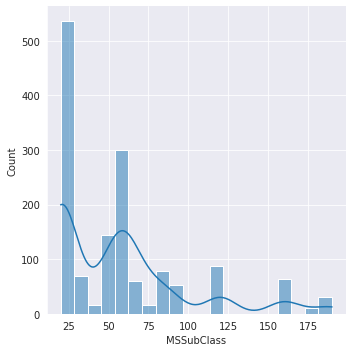

LotFrontage
2.382499177054863


<Figure size 432x288 with 0 Axes>

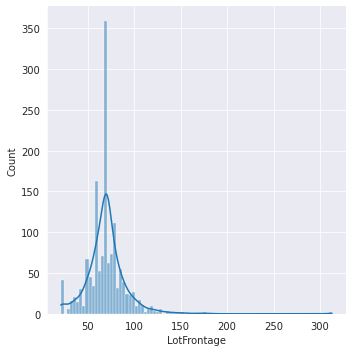

LotArea
12.195142125084478


<Figure size 432x288 with 0 Axes>

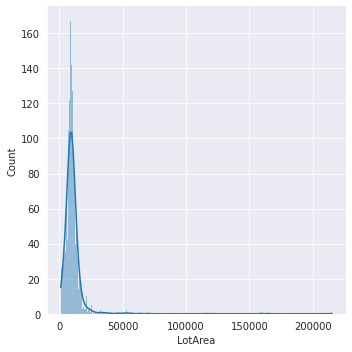

OverallQual
0.2167209765258641


<Figure size 432x288 with 0 Axes>

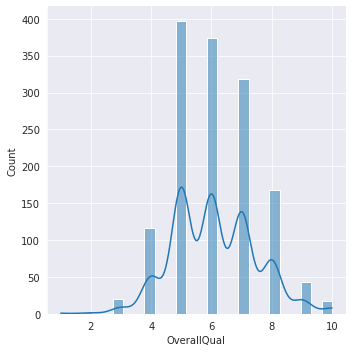

OverallCond
0.6923552135520978


<Figure size 432x288 with 0 Axes>

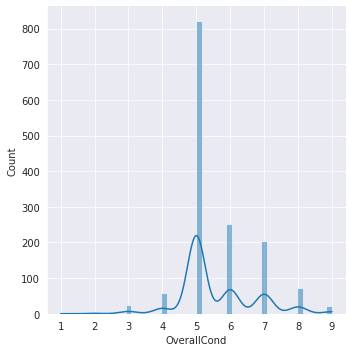

YearBuilt
-0.612830724202899


<Figure size 432x288 with 0 Axes>

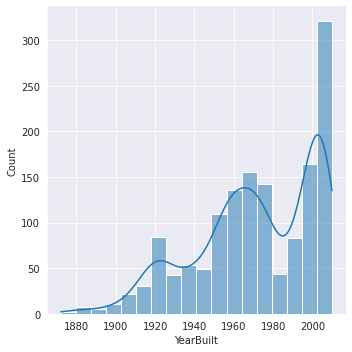

YearRemodAdd
-0.5030444967597948


<Figure size 432x288 with 0 Axes>

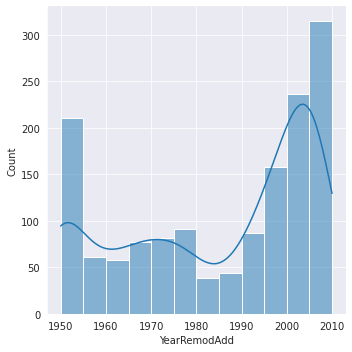

MasVnrArea
2.6736612614758912


<Figure size 432x288 with 0 Axes>

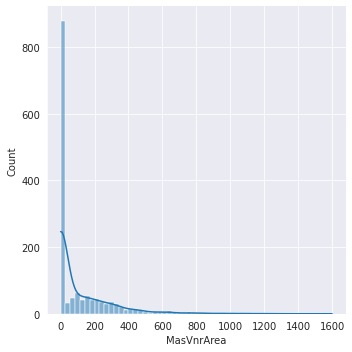

BsmtFinSF1
1.6837708962341815


<Figure size 432x288 with 0 Axes>

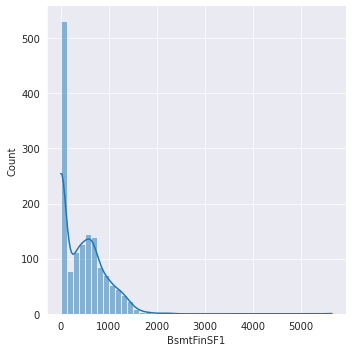

BsmtFinSF2
4.250888017057445


<Figure size 432x288 with 0 Axes>

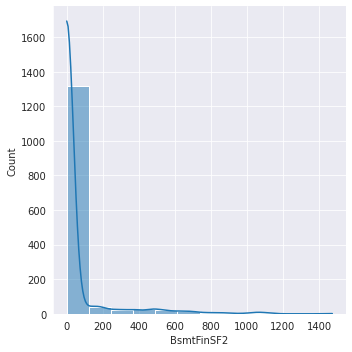

BsmtUnfSF
0.9193227015582005


<Figure size 432x288 with 0 Axes>

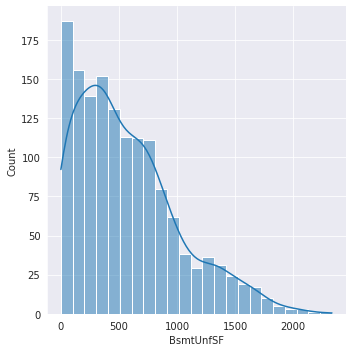

TotalBsmtSF
1.522688086978629


<Figure size 432x288 with 0 Axes>

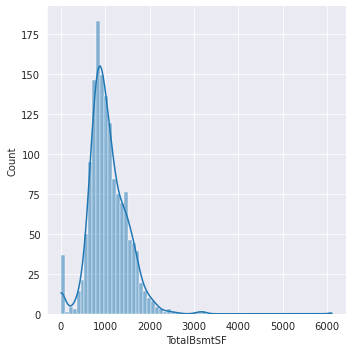

1stFlrSF
1.3753417421837937


<Figure size 432x288 with 0 Axes>

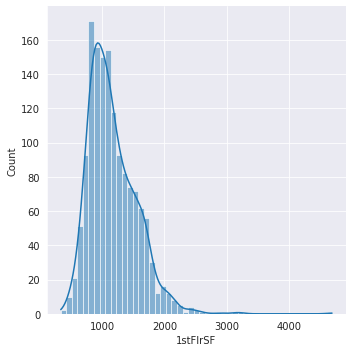

2ndFlrSF
0.8121942731961613


<Figure size 432x288 with 0 Axes>

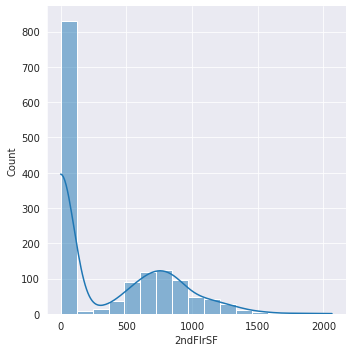

LowQualFinSF
9.002080417658552


<Figure size 432x288 with 0 Axes>

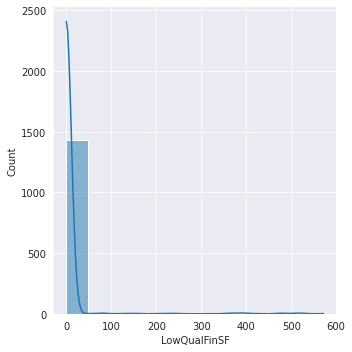

GrLivArea
1.365155954773434


<Figure size 432x288 with 0 Axes>

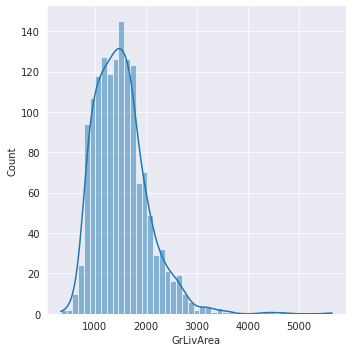

BsmtFullBath
0.5954540376067279


<Figure size 432x288 with 0 Axes>

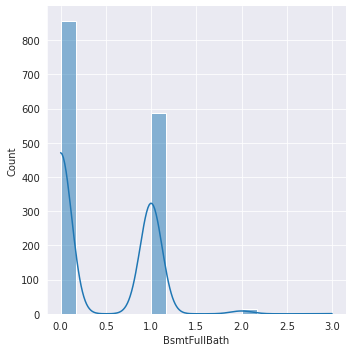

BsmtHalfBath
4.0991856695420035


<Figure size 432x288 with 0 Axes>

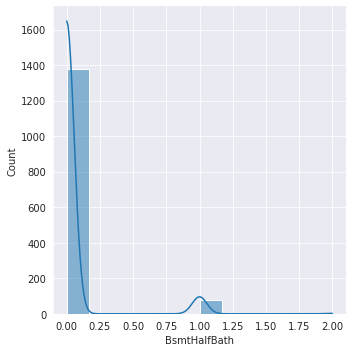

FullBath
0.0365239844325461


<Figure size 432x288 with 0 Axes>

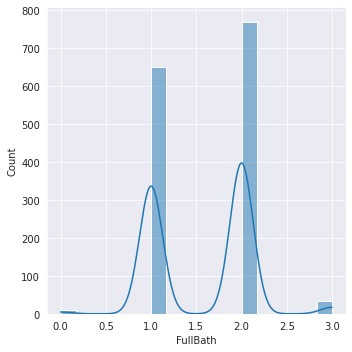

HalfBath
0.6752028347742616


<Figure size 432x288 with 0 Axes>

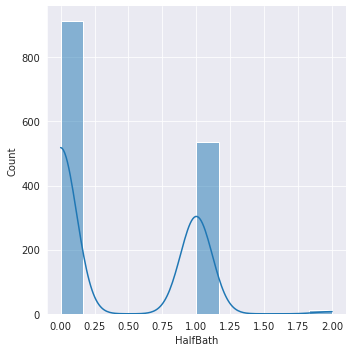

BedroomAbvGr
0.21157244158228097


<Figure size 432x288 with 0 Axes>

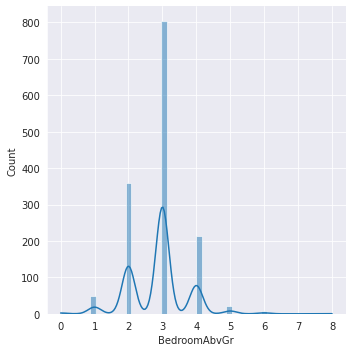

KitchebvGr
4.483784093860484


<Figure size 432x288 with 0 Axes>

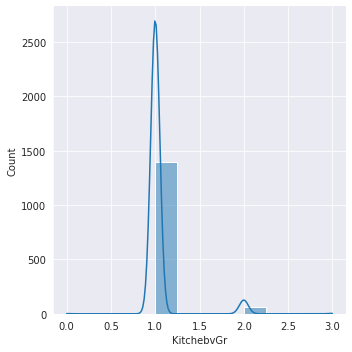

TotRmsAbvGrd
0.6756457673102017


<Figure size 432x288 with 0 Axes>

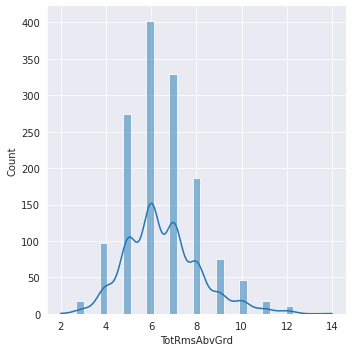

Fireplaces
0.6488976310170327


<Figure size 432x288 with 0 Axes>

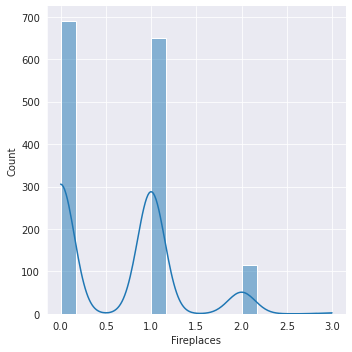

GarageYrBlt
-0.6674881457666015


<Figure size 432x288 with 0 Axes>

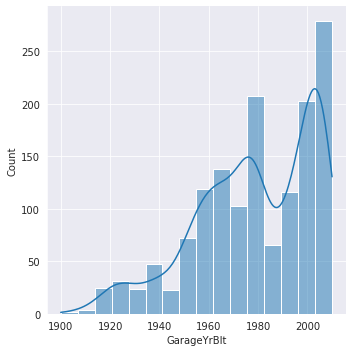

GarageCars
-0.34219689543081294


<Figure size 432x288 with 0 Axes>

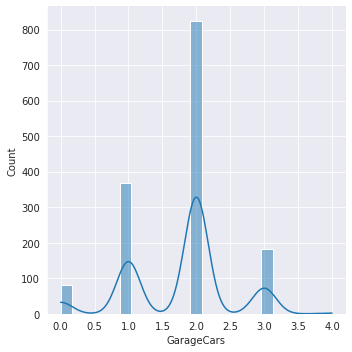

GarageArea
0.1797959420587727


<Figure size 432x288 with 0 Axes>

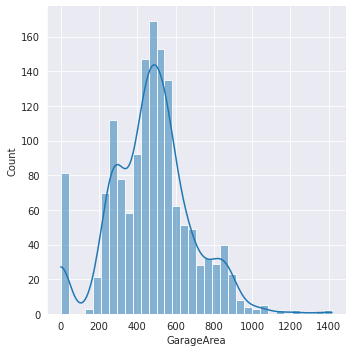

WoodDeckSF
1.5397916998042025


<Figure size 432x288 with 0 Axes>

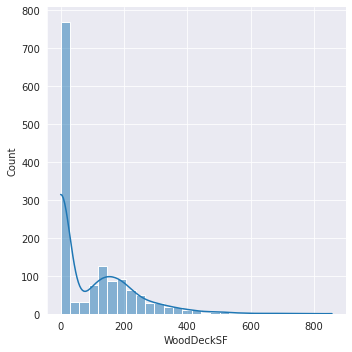

OpenPorchSF
2.361911928568972


<Figure size 432x288 with 0 Axes>

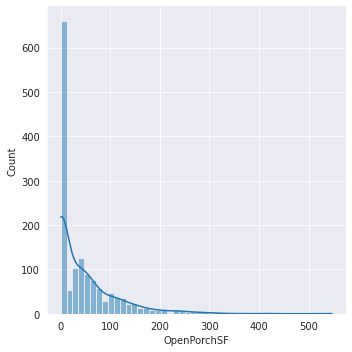

EnclosedPorch
3.086696471376678


<Figure size 432x288 with 0 Axes>

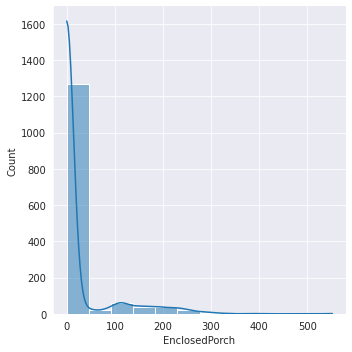

3SsnPorch
10.293752357165413


<Figure size 432x288 with 0 Axes>

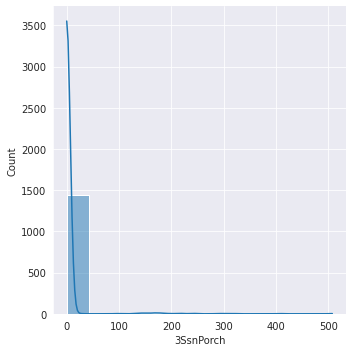

ScreenPorch
4.1179773827954875


<Figure size 432x288 with 0 Axes>

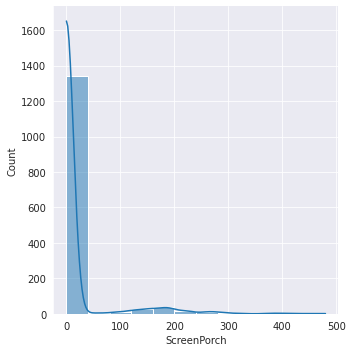

PoolArea
14.813134660429398


<Figure size 432x288 with 0 Axes>

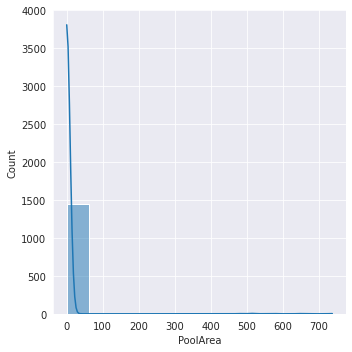

MiscVal
24.4516396173223


<Figure size 432x288 with 0 Axes>

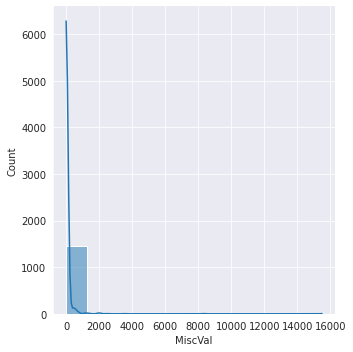

MoSold
0.2118350601903434


<Figure size 432x288 with 0 Axes>

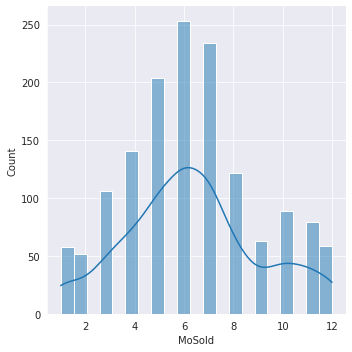

YrSold
0.096169579618143


<Figure size 432x288 with 0 Axes>

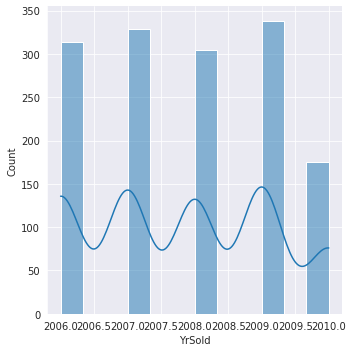

In [19]:
for col in num_data:
    print(col)
    print(skew(num_data[col]))
    plt.figure()
    sns.displot(num_data[col], kde=True)
    plt.show()

# Displaying Correlation Matrix for viewing significant variables

In [20]:
corr_matrix = num_data.corr().abs()
corr_matrix.style.background_gradient(cmap='PuBu',axis=0).set_precision(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchebvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSSubClass,1.00,0.36,0.14,0.03,0.06,0.03,0.04,0.02,0.07,0.07,0.14,0.24,0.25,0.31,0.05,0.07,0.00,0.00,0.13,0.18,0.02,0.28,0.04,0.05,0.08,0.04,0.10,0.01,0.01,0.01,0.04,0.03,0.01,0.01,0.01,0.02
LotFrontage,0.36,1.00,0.31,0.23,0.05,0.12,0.08,0.18,0.22,0.04,0.12,0.36,0.41,0.07,0.04,0.37,0.09,0.01,0.18,0.05,0.24,0.01,0.32,0.24,0.06,0.27,0.32,0.08,0.14,0.01,0.06,0.04,0.18,0.00,0.01,0.01
LotArea,0.14,0.31,1.00,0.11,0.01,0.01,0.01,0.10,0.21,0.11,0.00,0.26,0.30,0.05,0.00,0.26,0.16,0.05,0.13,0.01,0.12,0.02,0.19,0.27,0.02,0.15,0.18,0.17,0.08,0.02,0.02,0.04,0.08,0.04,0.00,0.01
OverallQual,0.03,0.23,0.11,1.00,0.09,0.57,0.55,0.41,0.24,0.06,0.31,0.54,0.48,0.30,0.03,0.59,0.11,0.04,0.55,0.27,0.10,0.18,0.43,0.40,0.52,0.60,0.56,0.24,0.31,0.11,0.03,0.06,0.07,0.03,0.07,0.03
OverallCond,0.06,0.05,0.01,0.09,1.00,0.38,0.07,0.13,0.05,0.04,0.14,0.17,0.14,0.03,0.03,0.08,0.05,0.12,0.19,0.06,0.01,0.09,0.06,0.02,0.31,0.19,0.15,0.00,0.03,0.07,0.03,0.05,0.00,0.07,0.00,0.04
YearBuilt,0.03,0.12,0.01,0.57,0.38,1.00,0.59,0.31,0.25,0.05,0.15,0.39,0.28,0.01,0.18,0.20,0.19,0.04,0.47,0.24,0.07,0.17,0.10,0.15,0.78,0.54,0.48,0.22,0.19,0.39,0.03,0.05,0.00,0.03,0.01,0.01
YearRemodAdd,0.04,0.08,0.01,0.55,0.07,0.59,1.00,0.18,0.13,0.07,0.18,0.29,0.24,0.14,0.06,0.29,0.12,0.01,0.44,0.18,0.04,0.15,0.19,0.11,0.62,0.42,0.37,0.21,0.23,0.19,0.05,0.04,0.01,0.01,0.02,0.04
MasVnrArea,0.02,0.18,0.10,0.41,0.13,0.31,0.18,1.00,0.26,0.07,0.11,0.36,0.34,0.17,0.07,0.39,0.09,0.03,0.28,0.20,0.10,0.04,0.28,0.25,0.25,0.36,0.37,0.16,0.12,0.11,0.02,0.06,0.01,0.03,0.01,0.01
BsmtFinSF1,0.07,0.22,0.21,0.24,0.05,0.25,0.13,0.26,1.00,0.05,0.50,0.52,0.45,0.14,0.06,0.21,0.65,0.07,0.06,0.00,0.11,0.08,0.04,0.26,0.15,0.22,0.30,0.20,0.11,0.10,0.03,0.06,0.14,0.00,0.02,0.01
BsmtFinSF2,0.07,0.04,0.11,0.06,0.04,0.05,0.07,0.07,0.05,1.00,0.21,0.10,0.10,0.10,0.01,0.01,0.16,0.07,0.08,0.03,0.02,0.04,0.04,0.05,0.09,0.04,0.02,0.07,0.00,0.04,0.03,0.09,0.04,0.00,0.02,0.03


# Removing the columns with correlation greater than 0.8

In [21]:
# Removing the values from the lower triangle of correlation martix and only taking the values of upper triangle.
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSSubClass,NaN,0.357056,0.139781,0.032628,0.059316,0.027850,0.040581,0.022895,0.069836,0.065649,...,0.098672,0.012579,0.006100,0.012037,0.043825,0.026030,0.008283,0.007683,0.013585,0.021407
LotFrontage,NaN,NaN,0.306795,0.234196,0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,...,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768
LotArea,NaN,NaN,NaN,0.105806,0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,...,0.180403,0.171698,0.084774,0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.014261
OverallQual,NaN,NaN,NaN,NaN,0.091932,0.572323,0.550684,0.410238,0.239666,0.059119,...,0.562022,0.238923,0.308819,0.113937,0.030371,0.064886,0.065166,0.031406,0.070815,0.027347
OverallCond,NaN,NaN,NaN,NaN,NaN,0.375983,0.073741,0.127788,0.046231,0.040229,...,0.151521,0.003334,0.032589,0.070356,0.025504,0.054811,0.001985,0.068777,0.003511,0.043950
YearBuilt,NaN,NaN,NaN,NaN,NaN,NaN,0.592855,0.314745,0.249503,0.049107,...,0.478954,0.224880,0.188686,0.387268,0.031355,0.050364,0.004950,0.034383,0.012398,0.013618
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.179186,0.128451,0.067759,...,0.371600,0.205726,0.226298,0.193919,0.045286,0.038740,0.005829,0.010286,0.021490,0.035743
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.263582,0.072302,...,0.372567,0.159349,0.124965,0.109849,0.018795,0.061453,0.011723,0.029815,0.005940,0.008184
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050117,...,0.296970,0.204306,0.111761,0.102303,0.026451,0.062021,0.140491,0.003571,0.015727,0.014359
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.018227,0.067898,0.003093,0.036543,0.029993,0.088871,0.041709,0.004940,0.015211,0.031706


In [22]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# View shape of Dataset

In [23]:
num_data.shape

(1460, 36)

# Dropping columns with correlation greater than 0.8

In [24]:
num_data.drop(to_drop, axis=1, inplace=True)

# View shape of Dataset after dropping columns

In [25]:
num_data.shape

(1460, 33)

# Creating copy of variables

In [26]:
Xnum_data=num_data.iloc[:,0:32]
Ynum_data=data.iloc[:,-1]

In [27]:
print(Xnum_data.shape)
print(Ynum_data.shape)

(1460, 32)
(1460,)


# Only showing the pairplot of 10 best features

In [28]:
best_features=SelectKBest(score_func=chi2,k=10)
fit= best_features.fit(Xnum_data,Ynum_data)

In [29]:
dscore=pd.DataFrame(fit.scores_)
dcolumns=pd.DataFrame(Xnum_data.columns)

# Printing variable's kbest score

In [30]:
feature_score=pd.concat([dcolumns,dscore],axis =1)
feature_score.columns = ['Variables','Scores']
feature_score

,Variables,Scores
0,MSSubClass,1.928123e+04
1,LotFrontage,5.066301e+03
2,LotArea,1.011497e+07
3,OverallQual,3.780776e+02
4,OverallCond,1.549787e+02
5,YearBuilt,4.438528e+02
6,YearRemodAdd,1.888822e+02
7,MasVnrArea,2.857403e+05
8,BsmtFinSF1,3.999851e+05
9,BsmtFinSF2,3.688827e+05


# 10 Best Features in Numerical Data

In [31]:
best10_features=feature_score.nlargest(10,'Scores')
best10_features

,Variables,Scores
2,LotArea,1.011497e+07
30,MiscVal,6.253332e+06
12,2ndFlrSF,4.648841e+05
8,BsmtFinSF1,3.999851e+05
29,PoolArea,3.835642e+05
9,BsmtFinSF2,3.688827e+05
7,MasVnrArea,2.857403e+05
10,BsmtUnfSF,2.747512e+05
13,LowQualFinSF,2.448810e+05
14,GrLivArea,1.968501e+05


In [32]:
forvisual=num_data[['MiscVal', 'LotArea', 'BsmtUnfSF', 'PoolArea', 'BsmtFinSF2',
       'BsmtFinSF1', 'MasVnrArea', '3SsnPorch', 'LowQualFinSF',
       '2ndFlrSF']]

# Adding a new variable/Column in forvisual 

In [33]:
forvisual['SalePrice']=data.SalePrice
forvisual

,MiscVal,LotArea,BsmtUnfSF,PoolArea,BsmtFinSF2,BsmtFinSF1,MasVnrArea,3SsnPorch,LowQualFinSF,2ndFlrSF,SalePrice
0,0,8450,150,0,0,706,196.0,0,0,854,208500
1,0,9600,284,0,0,978,0.0,0,0,0,181500
2,0,11250,434,0,0,486,162.0,0,0,866,223500
3,0,9550,540,0,0,216,0.0,0,0,756,140000
4,0,14260,490,0,0,655,350.0,0,0,1053,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,0,7917,953,0,0,0,0.0,0,0,694,175000
1456,0,13175,589,0,163,790,119.0,0,0,0,210000
1457,2500,9042,877,0,0,275,0.0,0,0,1152,266500
1458,0,9717,0,0,1029,49,0.0,0,0,0,142125


In [34]:
# for i in range(0,len(ndata.columns),4):
#     grp=sns.pairplot(ndata.iloc[:,i:i+4],diag_kind="hist", corner=True)

# Plotting pairplot

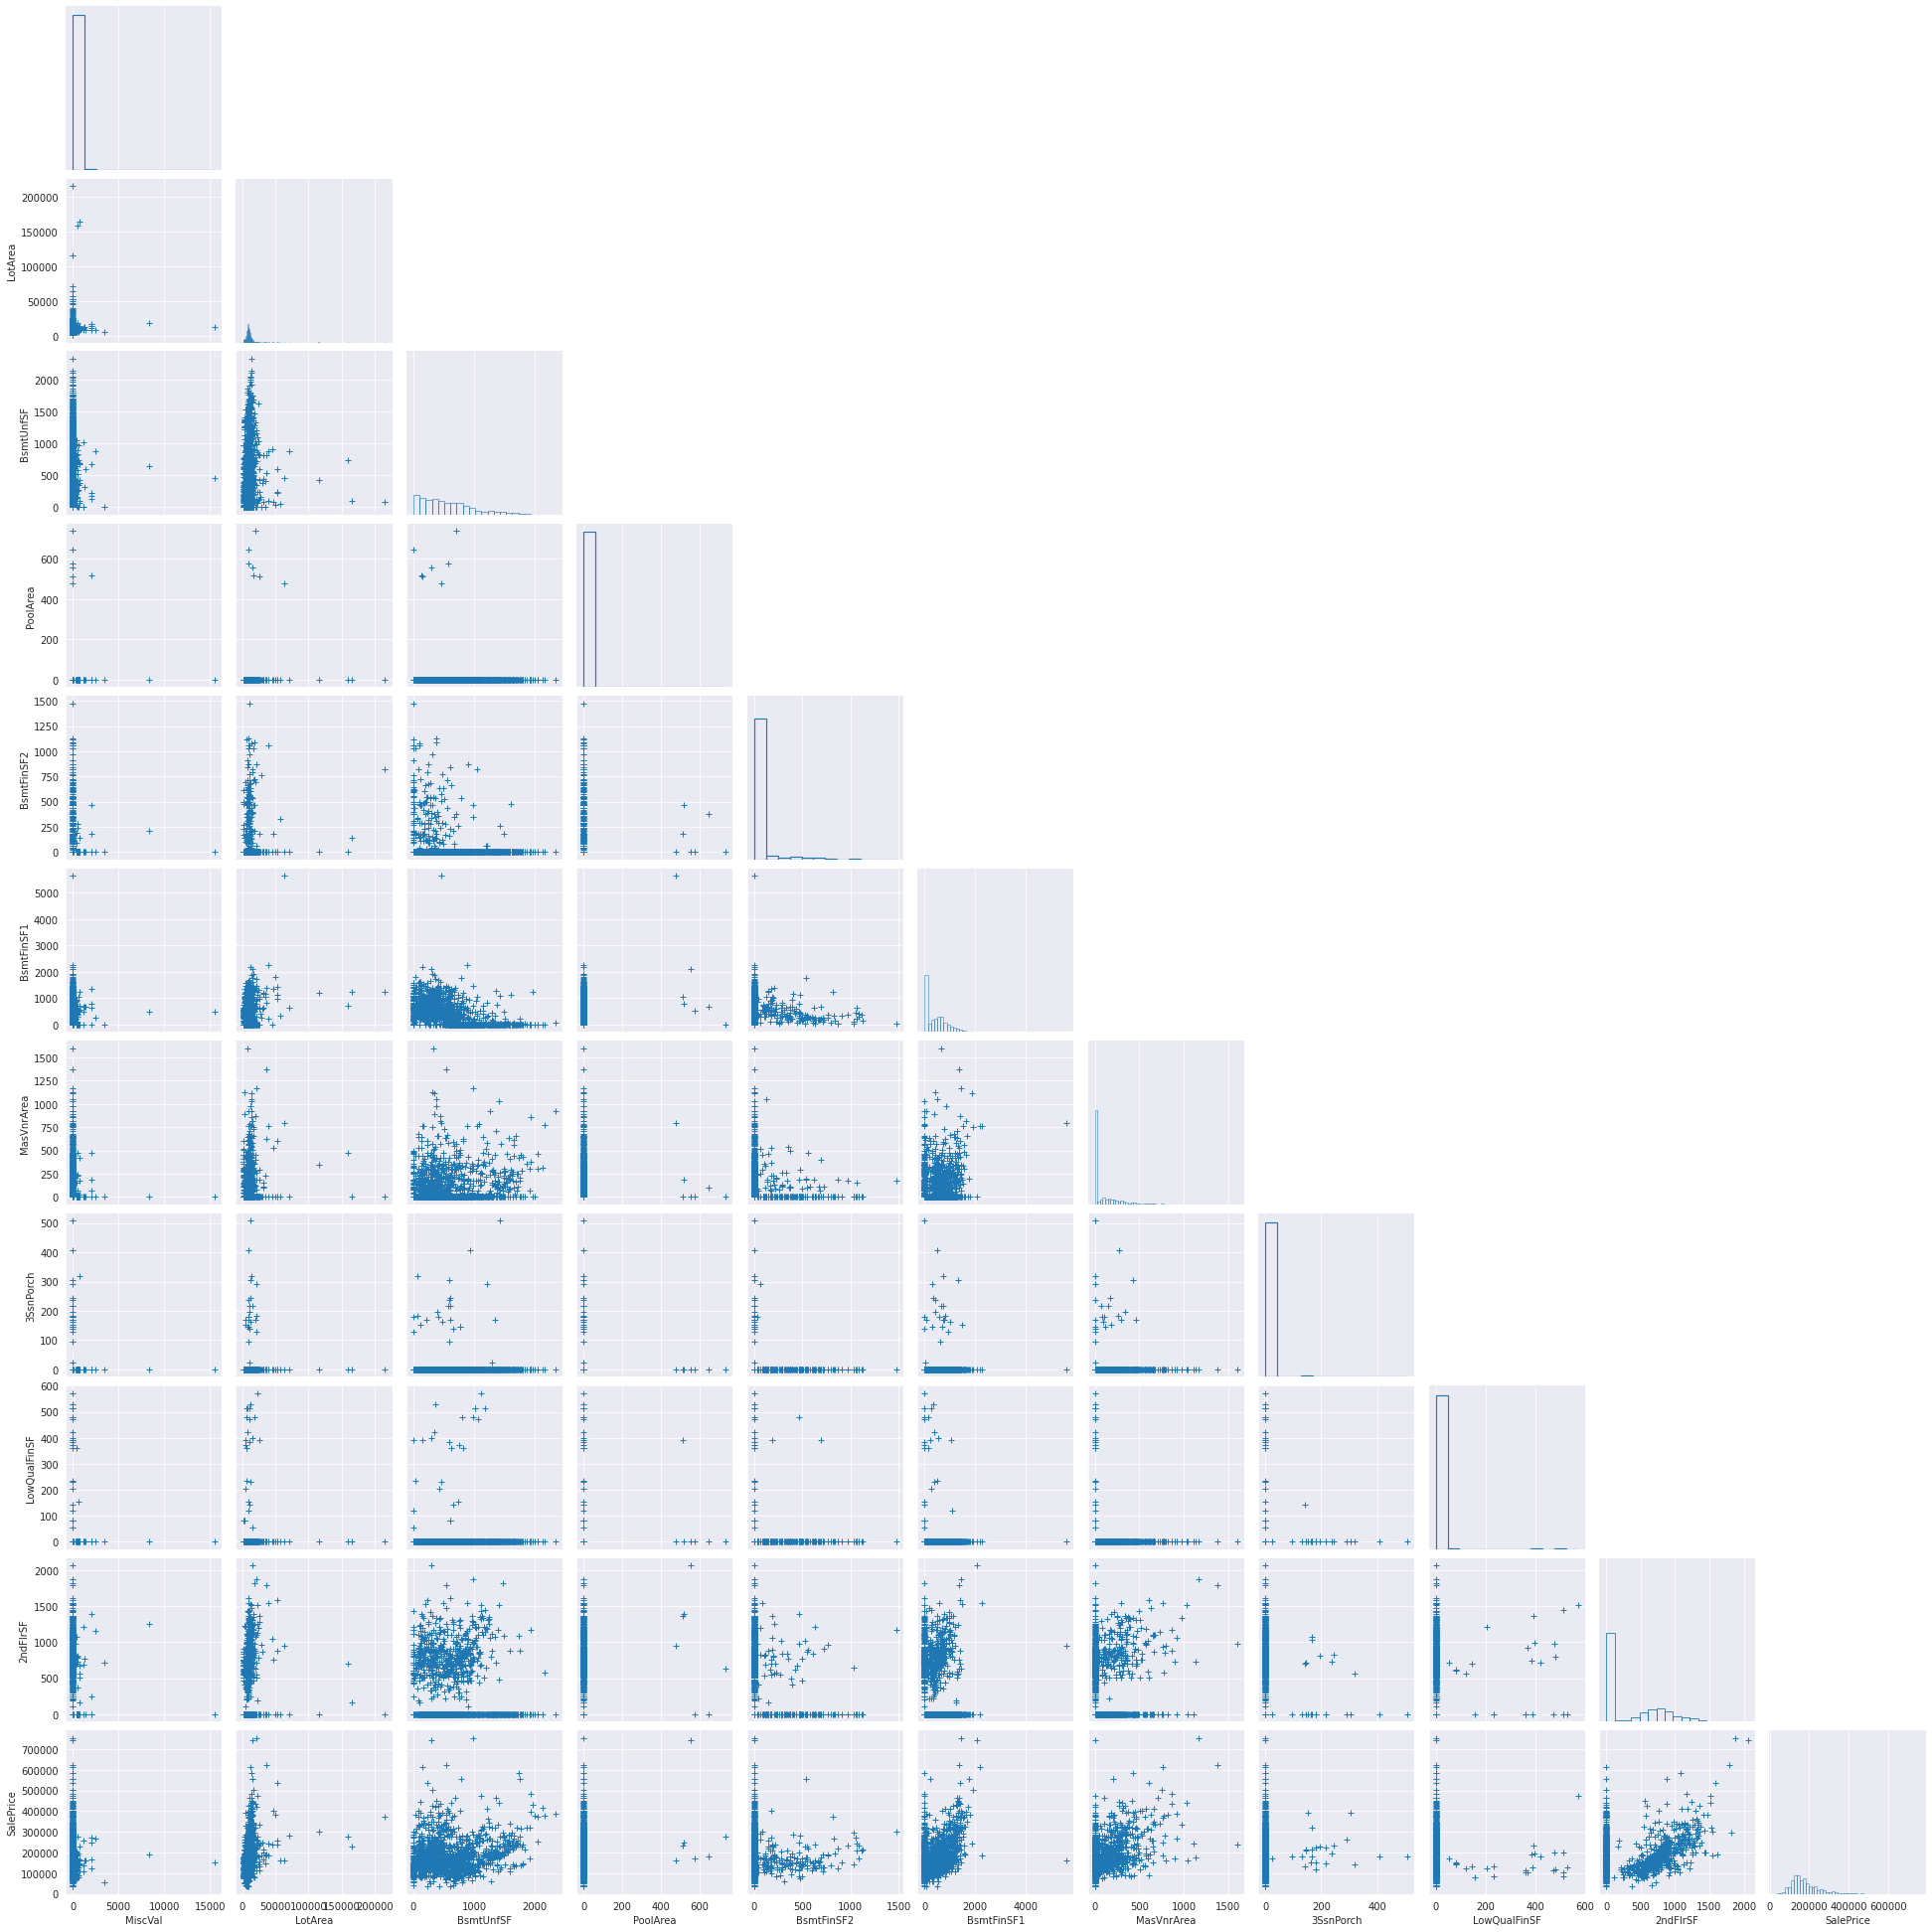

In [35]:
sns.pairplot(forvisual,plot_kws=dict(marker="+", linewidth=1),diag_kws=dict(fill=False),corner=True)

# Now working with categorical data


In [36]:
cat_data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# Viewing sum of all null values in categorical data

In [37]:
cat_data.isnull().sum().sum()

6617

# Viewing for each column sum of null values

In [38]:
cnull_val=cat_data.isna().sum()
cnull_val

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functiol            0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [39]:
# Below code gives percentage of null in every column
null_percentage = cat_data.isnull().sum()/num_data.shape[0]*100
null_percentage

MSZoning          0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
KitchenQual       0.000000
Functiol          0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
P

In [40]:
# Dropping the columns whose null %age > 60
col_to_drop = null_percentage[null_percentage>60].keys()

output_df = cat_data.drop(col_to_drop, axis=1)
output_df

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functiol,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,Norm,...,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal


# Missing value treatment for categorical data ----> (mean)

In [41]:
from sklearn.impute import SimpleImputer
value = output_df.values
# defining the imputer
imputer = SimpleImputer(missing_values=np.nan ,strategy='most_frequent')
#for col in cdata:
transformed_values= imputer.fit_transform(value)
transformed_values

array([['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal'],
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal'],
       ['RL', 'Pave', 'IR1', ..., 'Y', 'WD', 'Normal'],
       ...,
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal'],
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal'],
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal']], dtype=object)

In [42]:
# Converting the numpy.ndarray(transformed_values) to DataFrame
transformed_cate_data=pd.DataFrame(transformed_values)
transformed_cate_data

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,Norm,...,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal


In [43]:
# Adding variable/column names to above dataframe
transformed_cate_data.columns=output_df.columns
transformed_cate_data

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functiol,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,Norm,...,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal


In [44]:
# Checking if any null value in dataset
transformed_cate_data.isnull().sum().sum()

0

# Plotting Count plot for categorical dataset

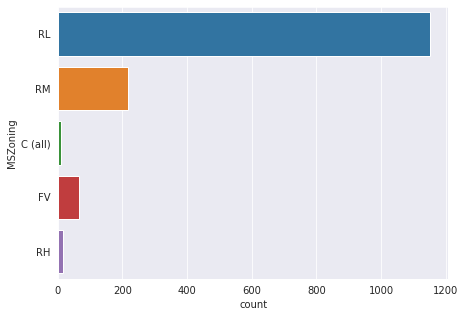

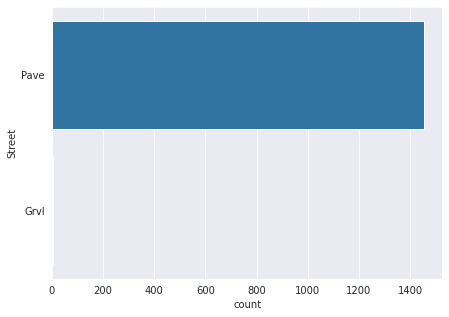

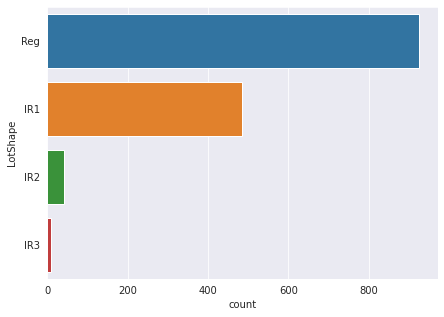

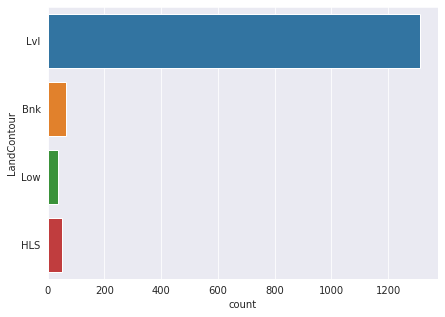

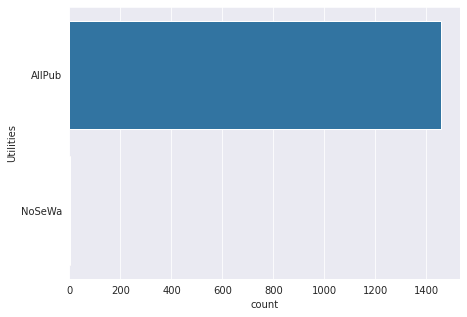

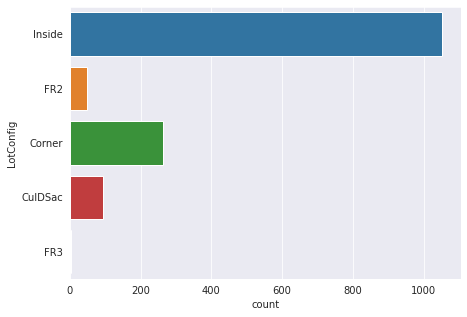

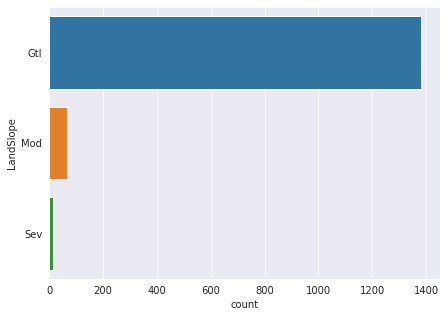

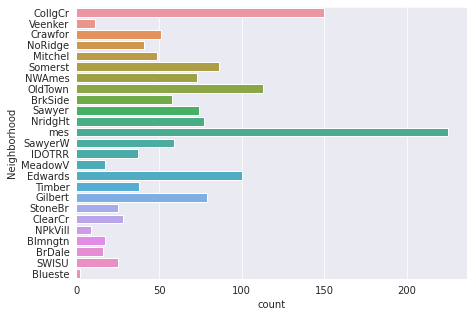

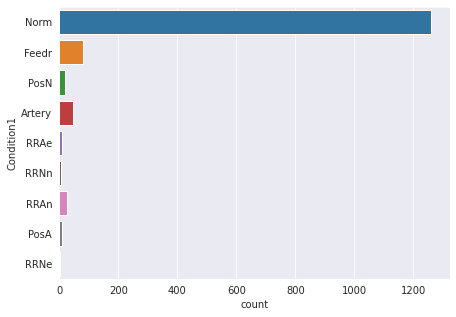

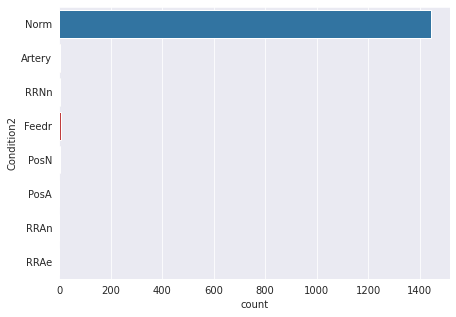

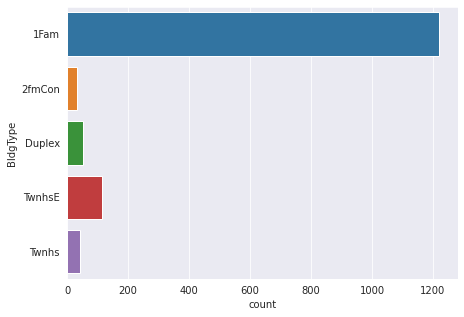

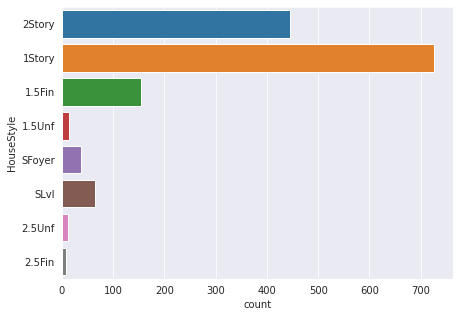

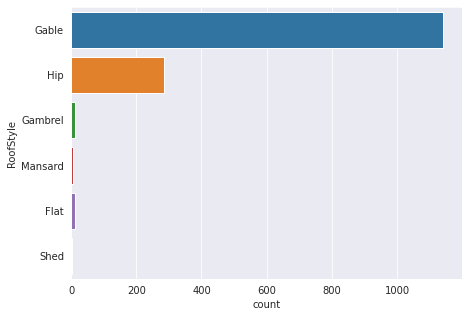

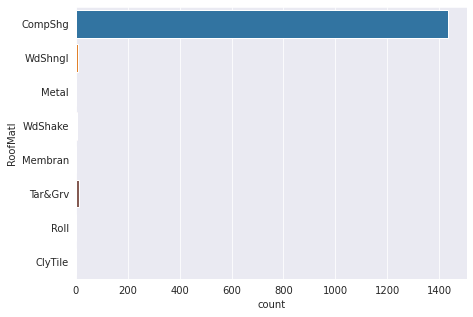

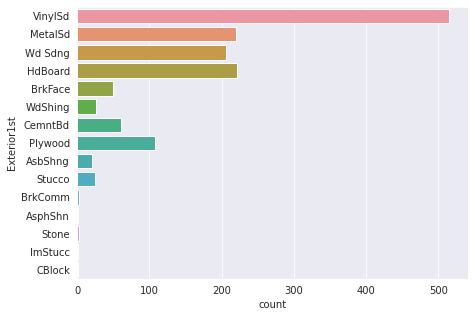

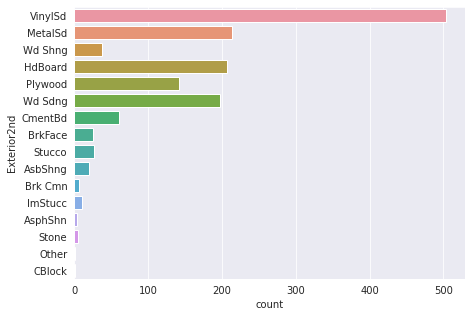

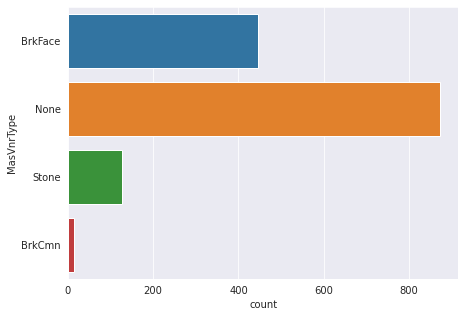

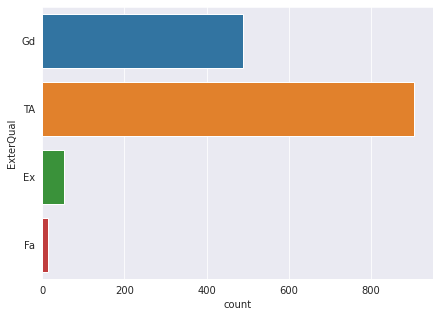

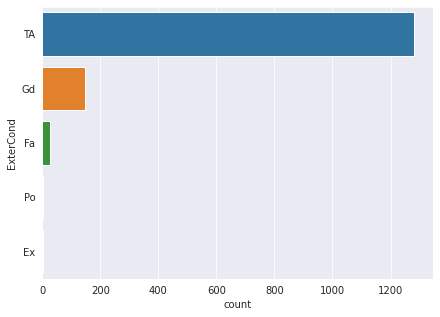

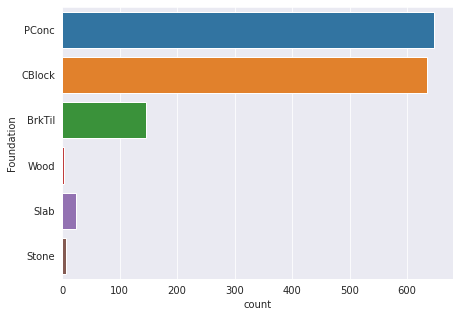

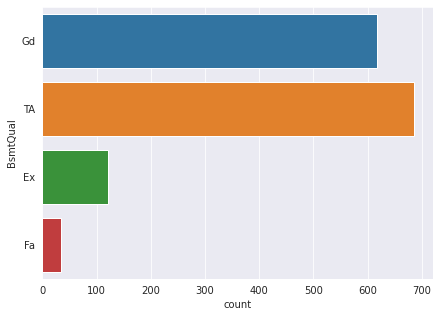

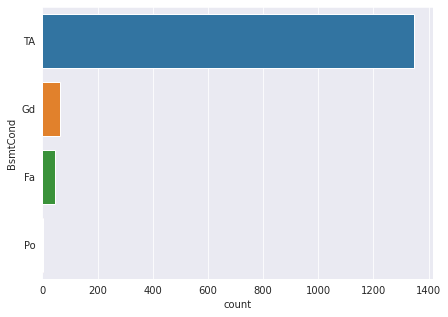

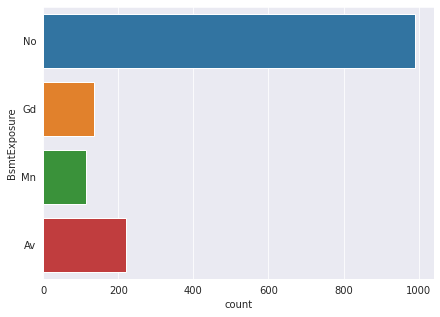

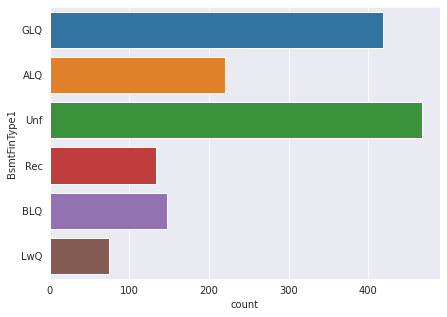

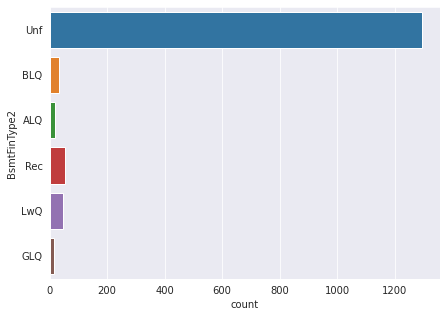

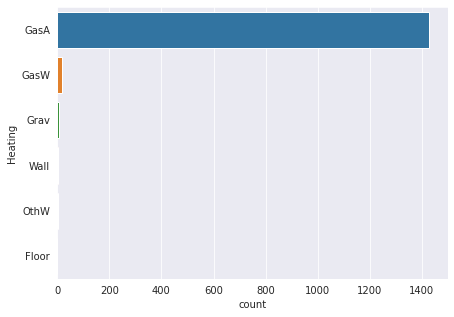

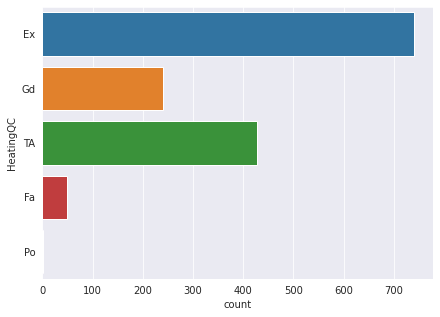

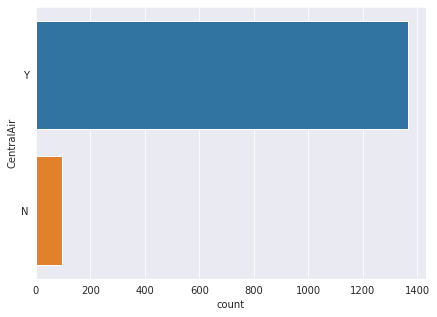

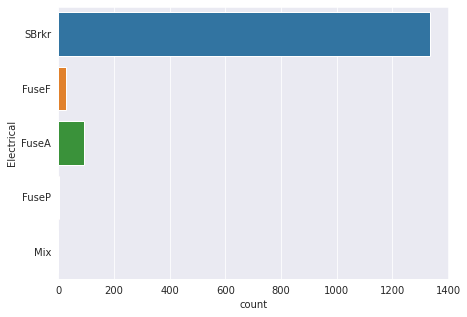

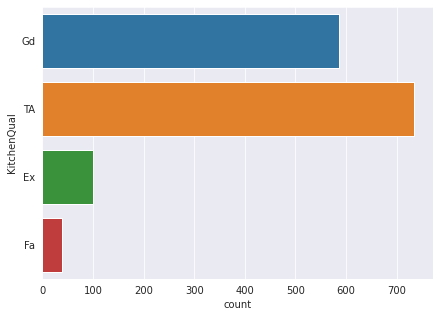

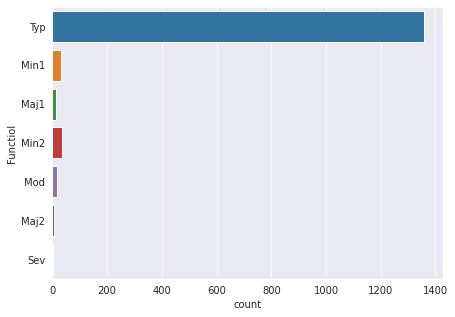

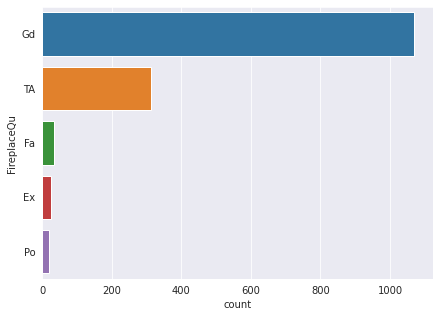

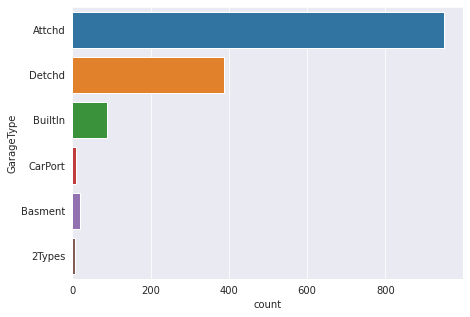

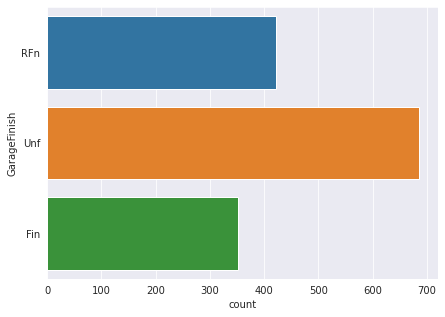

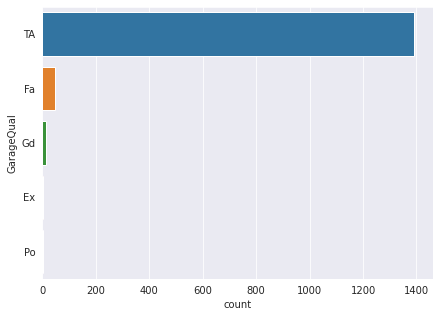

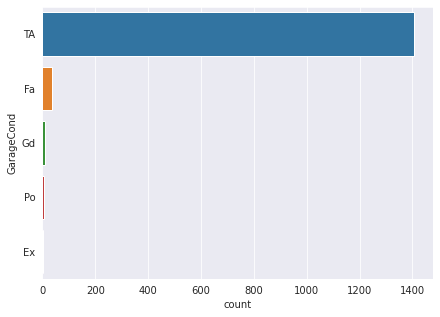

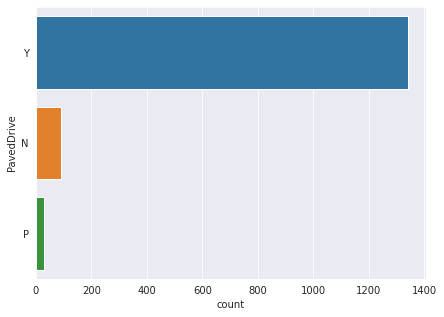

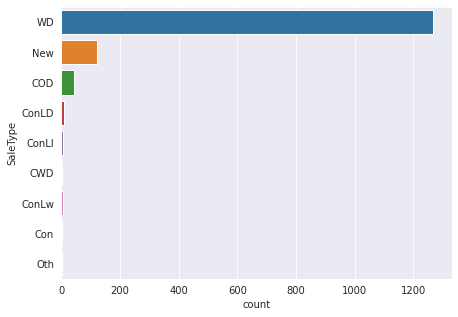

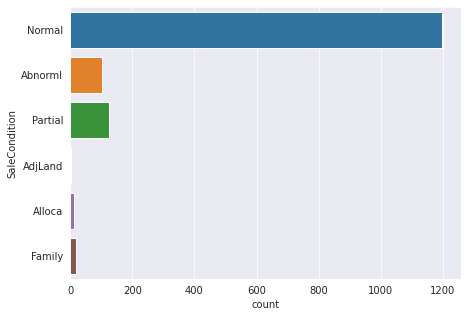

In [45]:
 for col in transformed_cate_data:
     plt.figure(figsize=(7,5))
     sns.countplot(y=transformed_cate_data[col])
     plt.show()

# Plotting Box plot for categorical dataset

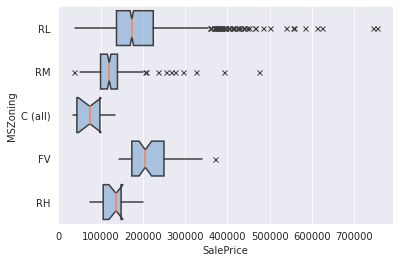

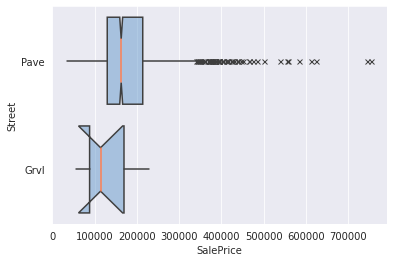

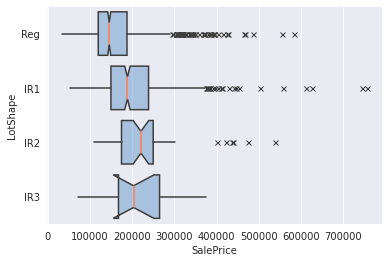

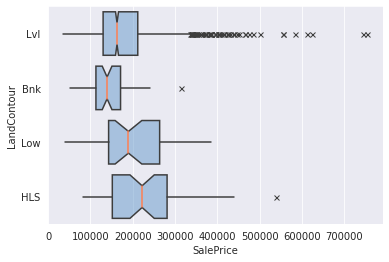

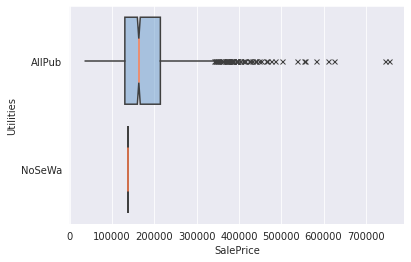

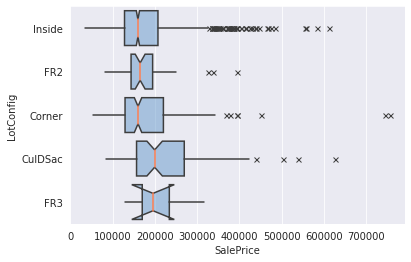

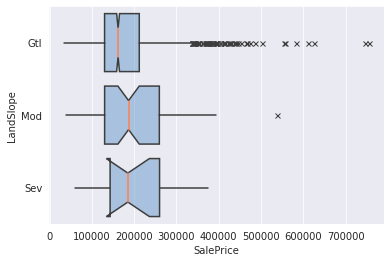

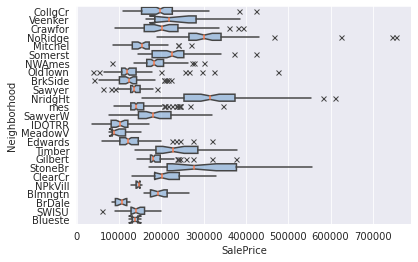

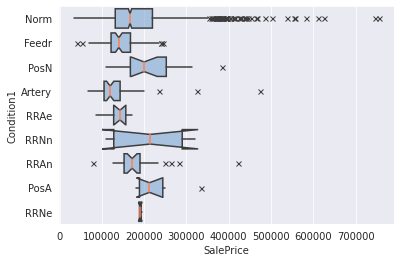

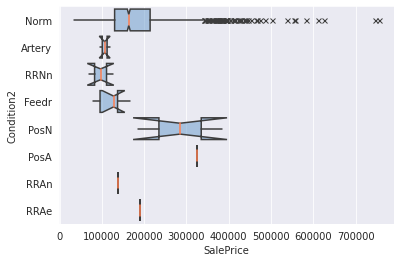

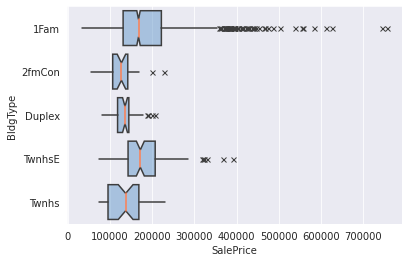

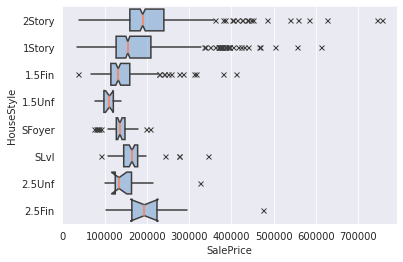

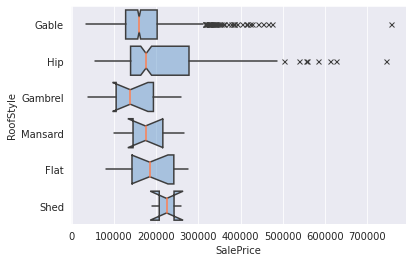

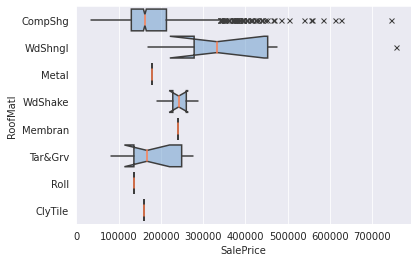

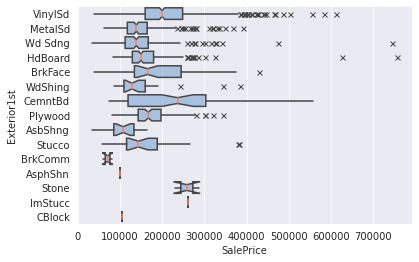

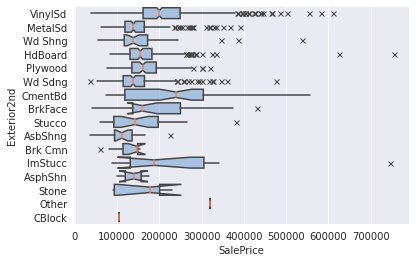

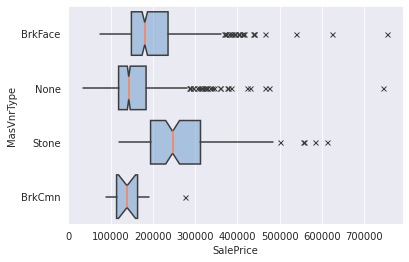

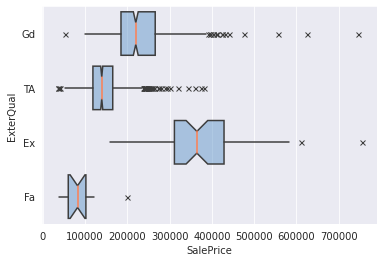

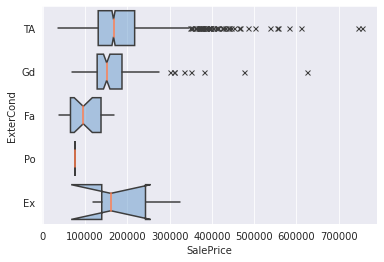

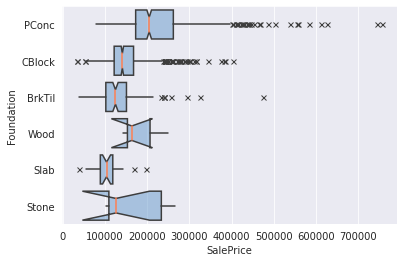

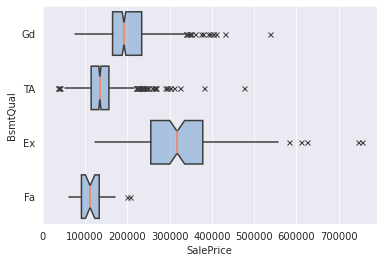

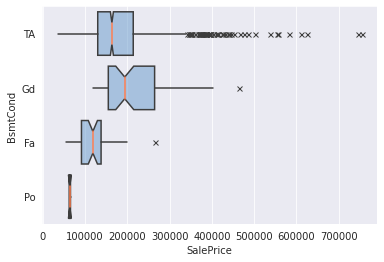

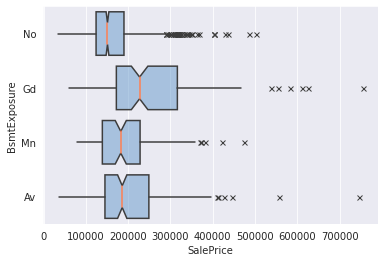

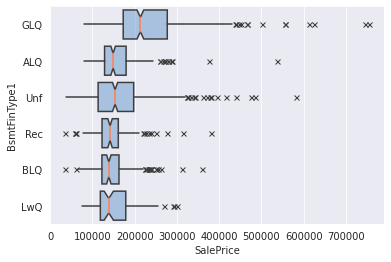

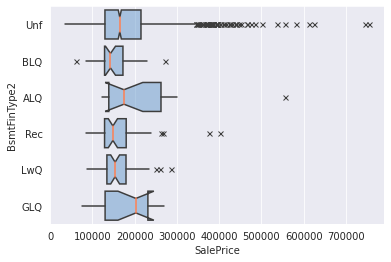

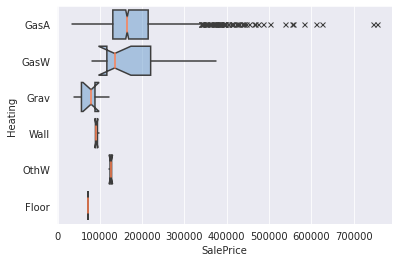

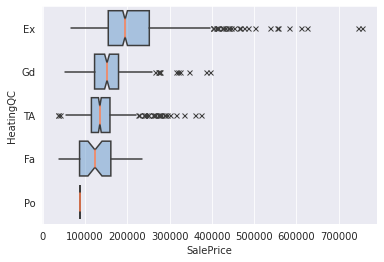

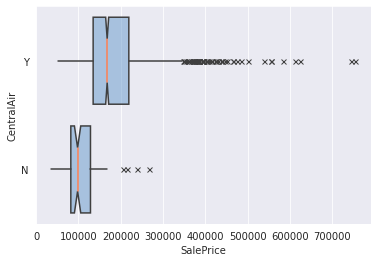

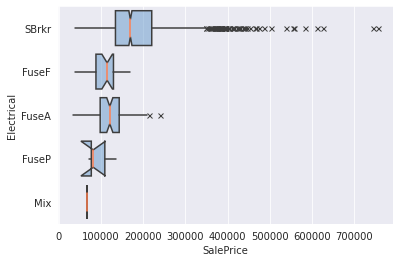

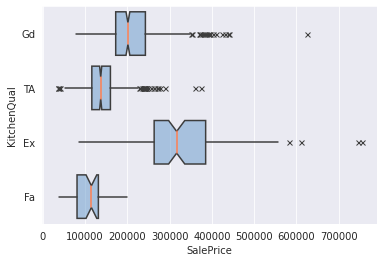

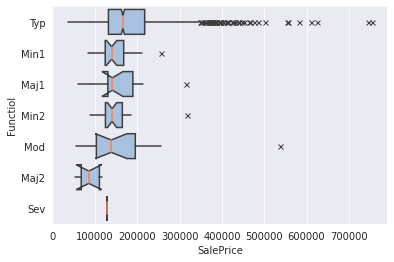

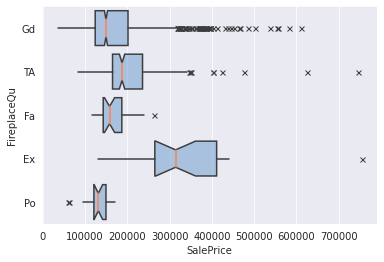

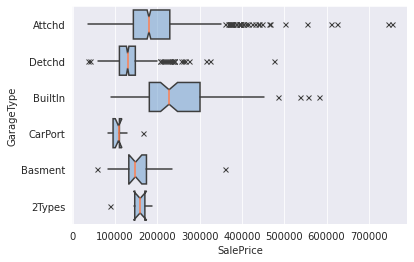

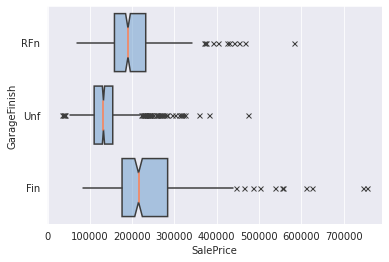

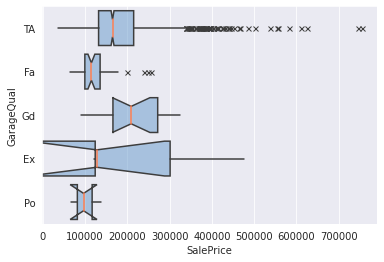

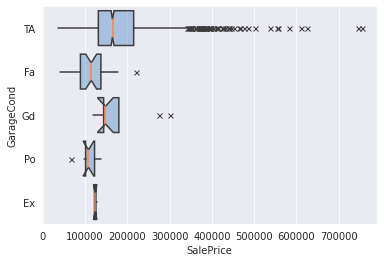

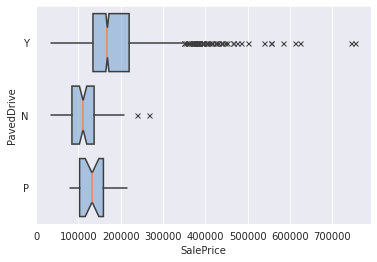

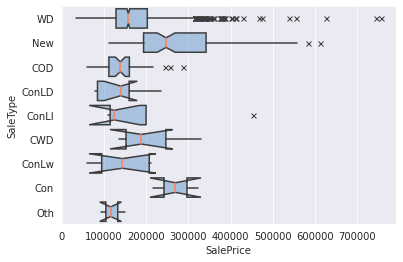

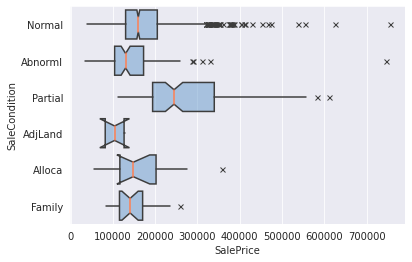

In [46]:
for col in transformed_cate_data:
     sns.boxplot(x=Y,y=transformed_cate_data[col], notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"})
     plt.show()

# Identifying significant variables using p-values and Chi-Square values

In [47]:
from scipy import stats
for i in transformed_cate_data.columns:
    x=pd.crosstab(transformed_cate_data[i],data.SalePrice)
    coeff,pval,dof,exp=stats.chi2_contingency(x.values)
    if pval<0.05:
        print('H1--Alternate------>Relation exists',i)
    else:
        print('H0--Null Hypothsis---- No Relation',i)
        transformed_cate_data.drop(i,axis=1,inplace=True)

H1--Alternate------>Relation exists MSZoning
H1--Alternate------>Relation exists Street
H1--Alternate------>Relation exists LotShape
H0--Null Hypothsis---- No Relation LandContour
H0--Null Hypothsis---- No Relation Utilities
H1--Alternate------>Relation exists LotConfig
H0--Null Hypothsis---- No Relation LandSlope
H1--Alternate------>Relation exists Neighborhood
H0--Null Hypothsis---- No Relation Condition1
H0--Null Hypothsis---- No Relation Condition2
H0--Null Hypothsis---- No Relation BldgType
H0--Null Hypothsis---- No Relation HouseStyle
H0--Null Hypothsis---- No Relation RoofStyle
H0--Null Hypothsis---- No Relation RoofMatl
H0--Null Hypothsis---- No Relation Exterior1st
H0--Null Hypothsis---- No Relation Exterior2nd
H1--Alternate------>Relation exists MasVnrType
H1--Alternate------>Relation exists ExterQual
H1--Alternate------>Relation exists ExterCond
H1--Alternate------>Relation exists Foundation
H1--Alternate------>Relation exists BsmtQual
H1--Alternate------>Relation exists Bsm

# Combining numerical and categorical datasets

In [48]:
fulldata=pd.concat([num_data,transformed_cate_data],axis=1)

In [49]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

In [50]:
fulldata['SalePrice'] = data.SalePrice

In [51]:
fulldata.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,BsmtCond,BsmtExposure,Heating,CentralAir,KitchenQual,FireplaceQu,GarageFinish,SaleType,SaleCondition,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,TA,No,GasA,Y,Gd,Gd,RFn,WD,Normal,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,TA,Gd,GasA,Y,TA,TA,RFn,WD,Normal,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,TA,Mn,GasA,Y,Gd,TA,RFn,WD,Normal,223500


In [71]:
 #Removing Outliers
for i in fulldata.columns:
    
    if(fulldata[i].dtypes !='O'):
        
         q1=fulldata[i].quantile(0.25)

         q3=fulldata[i].quantile(0.75)

         iqr=q3-q1

         UB= q3+1.5*iqr

         LB =q1-1.5*iqr
    
         fulldata[i]=np.where(fulldata[i]>UB, UB, fulldata[i])

         fulldata[i]=np.where(fulldata[i]<LB, LB, fulldata[i])

# Plotting Box plot for treated dataset

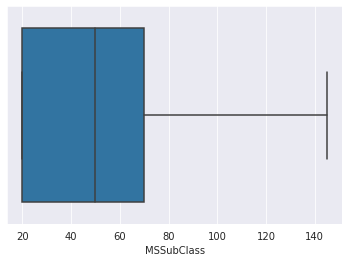

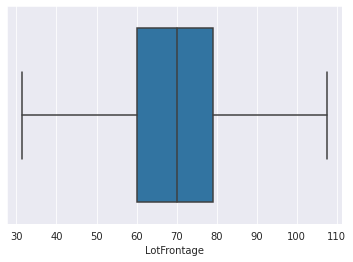

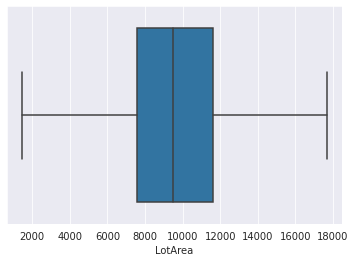

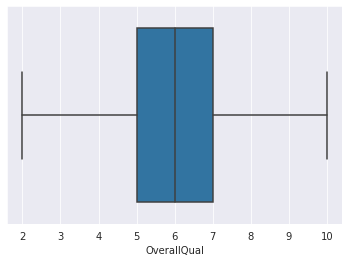

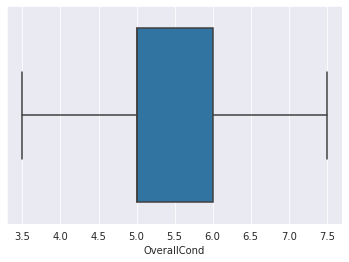

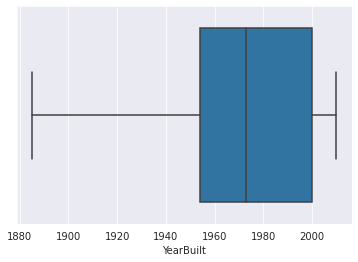

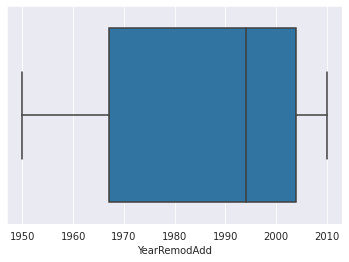

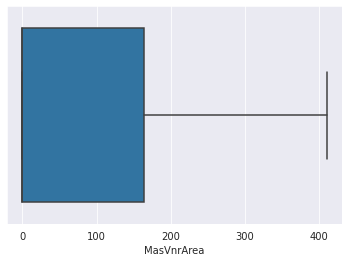

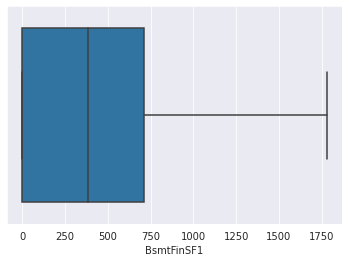

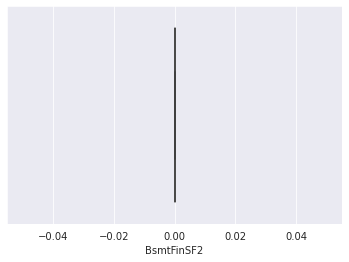

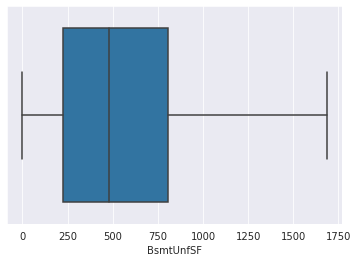

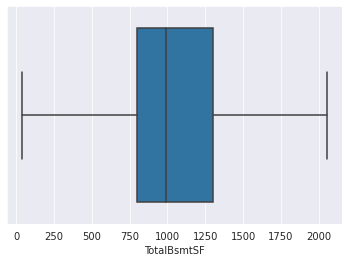

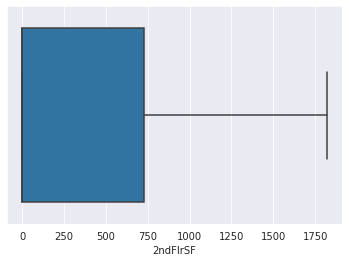

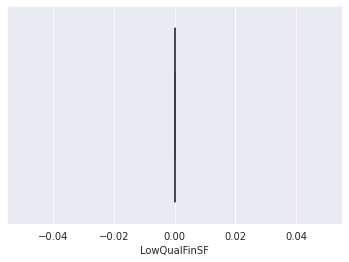

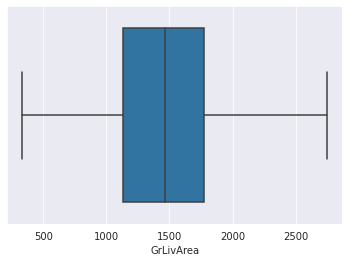

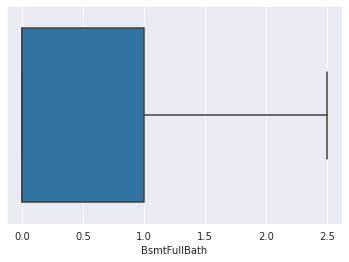

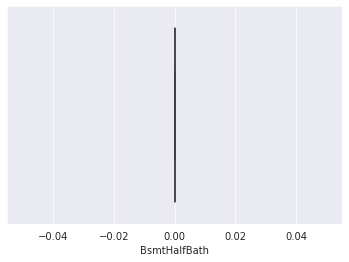

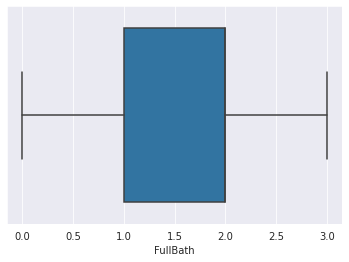

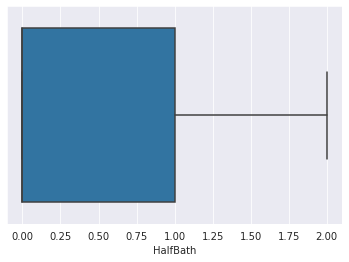

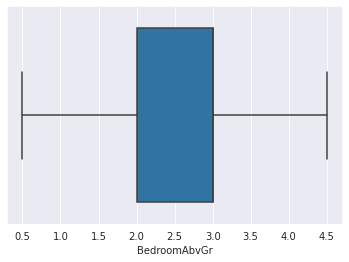

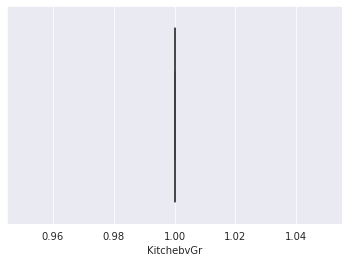

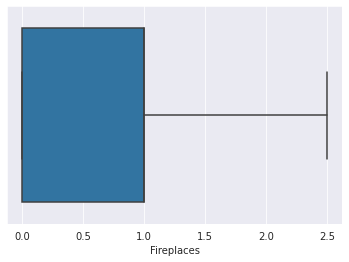

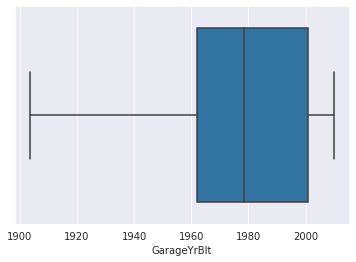

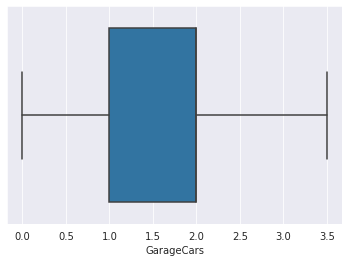

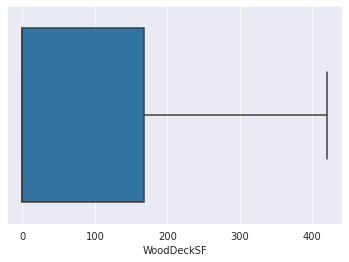

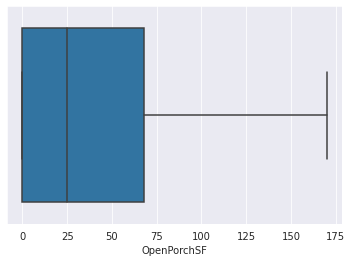

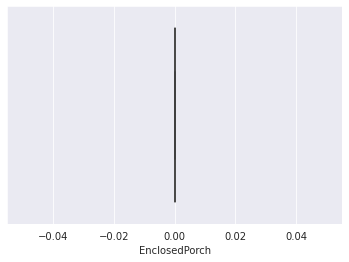

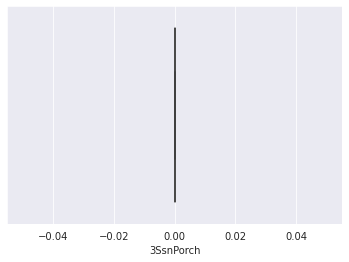

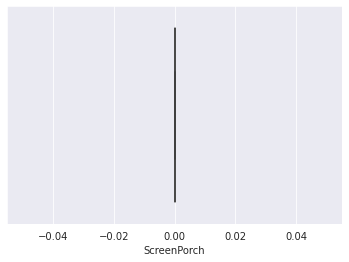

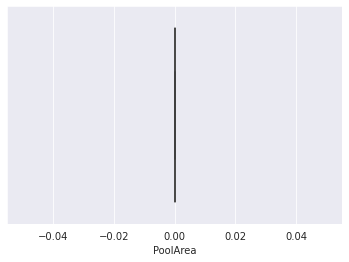

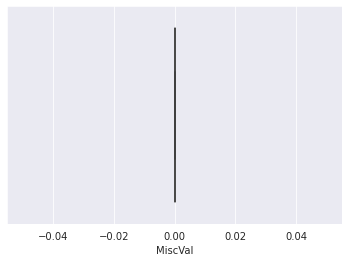

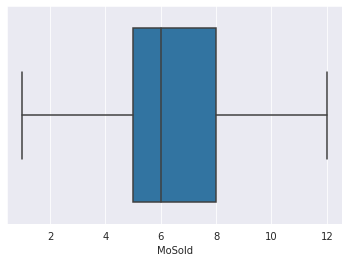

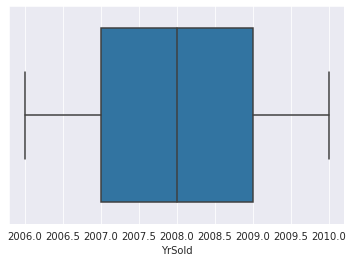

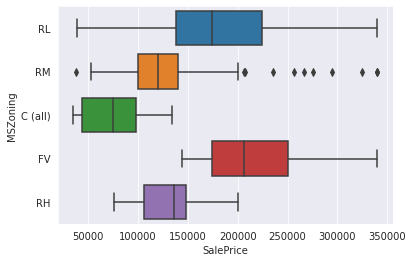

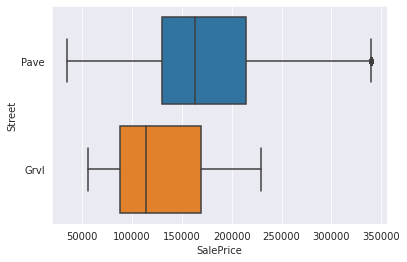

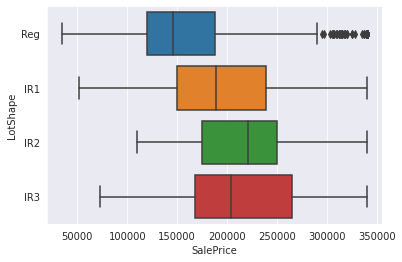

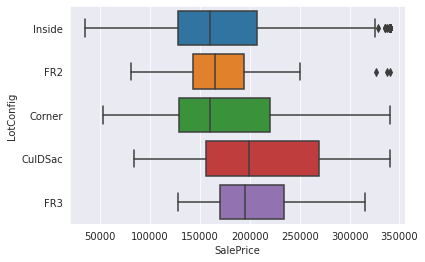

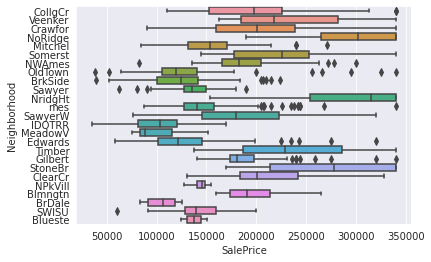

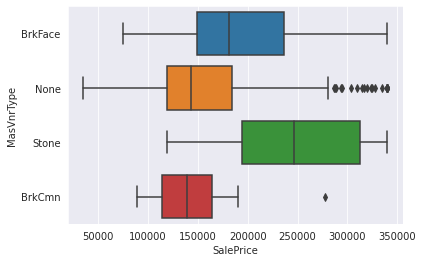

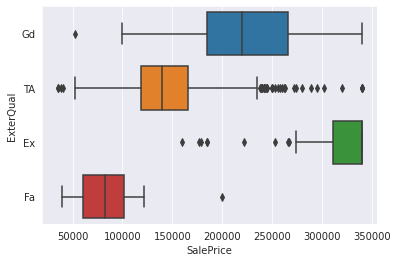

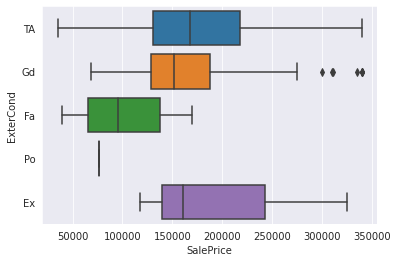

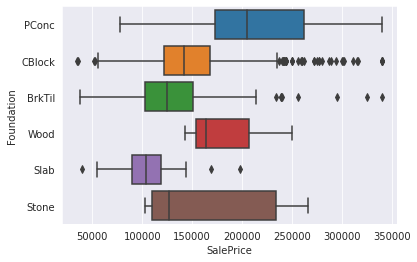

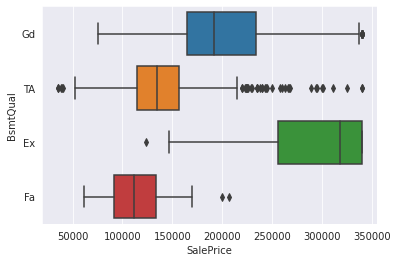

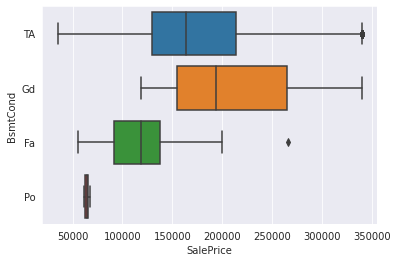

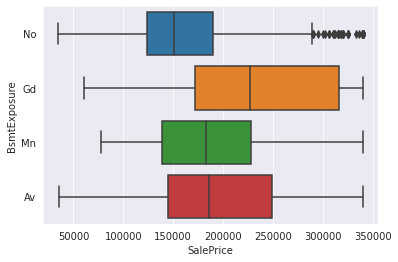

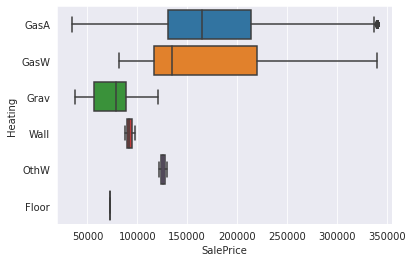

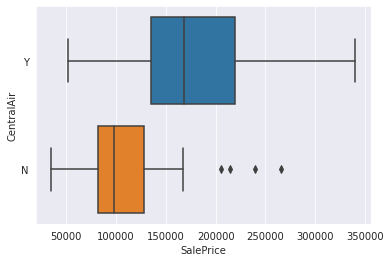

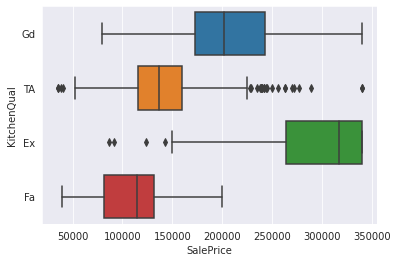

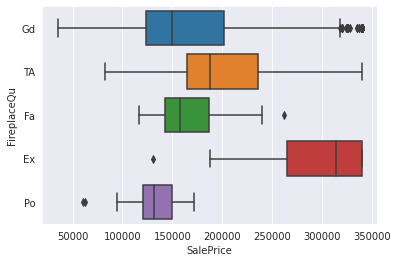

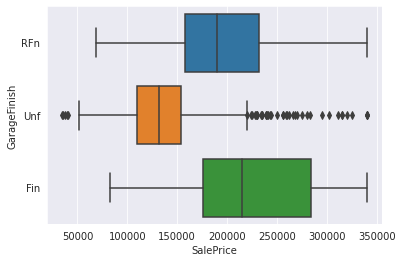

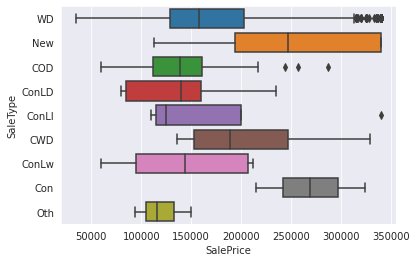

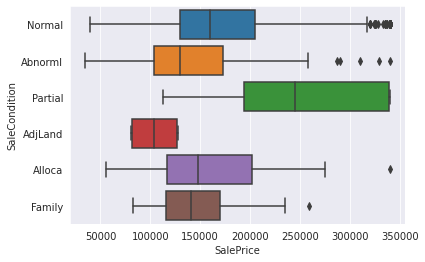

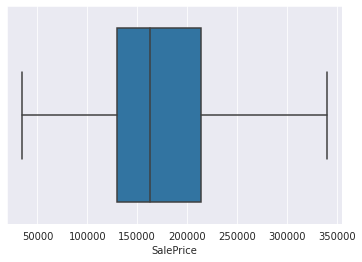

In [72]:
for i in fulldata.columns:
    if fulldata[i].dtypes=='int64' or fulldata[i].dtypes=='float64':
        sns.boxplot(fulldata[i])
        plt.show()
    else:
        sns.boxplot(x=fulldata['SalePrice'],y=fulldata[i])
        plt.show()

In [ ]:
# -----------------------------------------COMPLETED